In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier 
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report , confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import LocalOutlierFactor

In [2]:
data = pd.read_csv('heart1.csv')
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
np.unique(data['HeartDisease'] , return_counts=True)

(array([0, 1], dtype=int64), array([410, 508], dtype=int64))

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [6]:
len(data)

918

In [7]:
le_ExerciseAngina = LabelEncoder()
data['ExerciseAngina'] = le_ExerciseAngina.fit_transform(data['ExerciseAngina'])
le_Sex = LabelEncoder()
data['Sex'] = le_Sex.fit_transform(data['Sex'])
le_RestingECG = LabelEncoder()
data['RestingECG'] = le_RestingECG.fit_transform(data['RestingECG'])
le_ST_Slope = LabelEncoder()
data['ST_Slope'] = le_ST_Slope.fit_transform(data['ST_Slope'])
le_ChestPainType = LabelEncoder()
data['ChestPainType'] = le_ChestPainType.fit_transform(data['ChestPainType'])

In [268]:
scaler = StandardScaler()
data.iloc[:,:-1] = scaler.fit_transform(data.iloc[:,:-1])

C:\Users\T A T\AppData\Local\Temp\ipykernel_9592\3879440341.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-1.4331398  -0.47848359 -1.75135854 -0.5845565   0.05188098 -1.53921271
 -0.90277524  0.05188098 -1.75135854 -0.5845565  -1.75135854  0.47617263
 -1.53921271 -0.47848359 -1.22099397  0.05188098 -1.64528563 -1.11492106
  0.68831845 -1.85743145 -1.11492106 -1.00884815 -0.47848359 -1.00884815
 -1.4331398  -1.85743145 -0.05419193 -0.16026485 -0.05419193 -0.26633776
 -0.05419193  0.2640268   0.05188098 -1.32706689 -1.11492106 -2.2817231
  1.21868302 -1.32706689 -0.5845565  -0.5845565   0.05188098  0.05188098
 -1.96350436 -0.16026485 -1.11492106  0.58224554 -1.75135854 -0.37241067
 -1.85743145 -1.32706689 -0.37241067 -0.69062941 -0.90277524 -1.32706689
 -0.16026485 -0.26633776 -2.38779602  0.47617263  0.05188098 -0.16026485
 -0.47848359 -1.11492106 -0.90277524 -0.79670232 -0.37241067 -1.75135854
 -0.90277524 -

In [270]:
X = data.iloc[:,:-1]
y = data.HeartDisease

In [271]:
x_train , x_test , y_train , y_test = train_test_split(X , y  , test_size=0.25 , random_state=42)

In [272]:
svc = SVC(C=10)
svc.fit(x_train , y_train)
y_pred = svc.predict(x_test)
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86        98
           1       0.92      0.86      0.89       132

    accuracy                           0.87       230
   macro avg       0.87      0.88      0.87       230
weighted avg       0.88      0.87      0.87       230



In [273]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train , y_train)
y_pred = knn.predict(x_test)
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83        98
           1       0.89      0.85      0.87       132

    accuracy                           0.85       230
   macro avg       0.85      0.85      0.85       230
weighted avg       0.85      0.85      0.85       230



In [274]:
parameter = {'n_neighbors':range(1,50)}
grid_search = GridSearchCV(knn , param_grid=parameter , n_jobs=-1 ,cv=5 , scoring='recall')
grid_search.fit(x_train, y_train)
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters: {'n_neighbors': 9}
Best score: 0.8830526315789473


In [228]:
LogisticRegression_model = LogisticRegression()
LogisticRegression_model.fit(x_train , y_train)
y_pred = LogisticRegression_model.predict(x_test)
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84        98
           1       0.90      0.85      0.88       132

    accuracy                           0.86       230
   macro avg       0.86      0.86      0.86       230
weighted avg       0.86      0.86      0.86       230



In [229]:
data.corr()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
Age,1.000000,0.055750,-0.077150,0.254399,-0.095282,0.198039,-0.007484,-0.382045,0.215793,0.258612,-0.268264,0.282039
Sex,0.055750,1.000000,-0.126559,0.005133,-0.200092,0.120076,0.071552,-0.189186,0.190664,0.105734,-0.150693,0.305445
ChestPainType,-0.077150,-0.126559,1.000000,-0.020647,0.067880,-0.073151,-0.072537,0.289123,-0.354727,-0.177377,0.213521,-0.386828
RestingBP,0.254399,0.005133,-0.020647,1.000000,0.100893,0.070193,0.022656,-0.112135,0.155101,0.164803,-0.075162,0.107589
Cholesterol,-0.095282,-0.200092,0.067880,0.100893,1.000000,-0.260974,-0.196544,0.235792,-0.034166,0.050148,0.111471,-0.232741
FastingBS,0.198039,0.120076,-0.073151,0.070193,-0.260974,1.000000,0.087050,-0.131438,0.060451,0.052698,-0.175774,0.267291
RestingECG,-0.007484,0.071552,-0.072537,0.022656,-0.196544,0.087050,1.000000,-0.179276,0.077500,-0.020438,-0.006778,0.057384
MaxHR,-0.382045,-0.189186,0.289123,-0.112135,0.235792,-0.131438,-0.179276,1.000000,-0.370425,-0.160691,0.343419,-0.400421
ExerciseAngina,0.215793,0.190664,-0.354727,0.155101,-0.034166,0.060451,0.077500,-0.370425,1.000000,0.408752,-0.428706,0.494282
Oldpeak,0.258612,0.105734,-0.177377,0.164803,0.050148,0.052698,-0.020438,-0.160691,0.408752,1.000000,-0.501921,0.403951


In [230]:
rfc = RandomForestClassifier(n_estimators=300 , max_depth=7)
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.87      0.90      0.88        98
           1       0.92      0.90      0.91       132

    accuracy                           0.90       230
   macro avg       0.90      0.90      0.90       230
weighted avg       0.90      0.90      0.90       230



In [231]:
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_train)
print(classification_report(y_train , y_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       312
           1       0.95      0.97      0.96       376

    accuracy                           0.95       688
   macro avg       0.95      0.95      0.95       688
weighted avg       0.95      0.95      0.95       688



In [232]:
xgb = XGBClassifier()
xgb.fit(x_train, y_train)
y_pred = xgb.predict(x_test)
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86        98
           1       0.92      0.86      0.89       132

    accuracy                           0.88       230
   macro avg       0.87      0.88      0.88       230
weighted avg       0.88      0.88      0.88       230



In [ ]:
catboost = CatBoostClassifier(learning_rate=0.03 , iterations=200 , max_depth=6 , eval_metric='Recall')
catboost.fit(x_train, y_train , eval_set=(x_test , y_test))

0:	learn: 0.9281915	test: 0.8636364	best: 0.8636364 (0)	total: 3.01ms	remaining: 599ms
1:	learn: 0.9015957	test: 0.8181818	best: 0.8636364 (0)	total: 5.75ms	remaining: 570ms
2:	learn: 0.9148936	test: 0.8257576	best: 0.8636364 (0)	total: 7.79ms	remaining: 512ms
3:	learn: 0.9148936	test: 0.8484848	best: 0.8636364 (0)	total: 9.39ms	remaining: 460ms
4:	learn: 0.9202128	test: 0.8484848	best: 0.8636364 (0)	total: 10.9ms	remaining: 426ms
5:	learn: 0.9228723	test: 0.8863636	best: 0.8863636 (5)	total: 12.5ms	remaining: 404ms
6:	learn: 0.9202128	test: 0.8863636	best: 0.8863636 (5)	total: 13.9ms	remaining: 384ms
7:	learn: 0.9202128	test: 0.8787879	best: 0.8863636 (5)	total: 15.2ms	remaining: 365ms
8:	learn: 0.9202128	test: 0.8863636	best: 0.8863636 (5)	total: 17.2ms	remaining: 365ms
9:	learn: 0.9148936	test: 0.8787879	best: 0.8863636 (5)	total: 18.6ms	remaining: 353ms
10:	learn: 0.9228723	test: 0.8787879	best: 0.8863636 (5)	total: 19.9ms	remaining: 342ms
11:	learn: 0.9255319	test: 0.8712121	best:

In [253]:
y_pred = catboost.predict(x_test)
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89        98
           1       0.92      0.91      0.92       132

    accuracy                           0.90       230
   macro avg       0.90      0.90      0.90       230
weighted avg       0.90      0.90      0.90       230



In [255]:
cv_scores = cross_val_score(catboost, X, y, cv=5, scoring='accuracy')  # استفاده از Cross-Validation
print(f"catboost Mean Accuracy: {cv_scores.mean():.4f}, Std Dev: {cv_scores.std():.4f}")

0:	learn: 0.8916256	total: 1.82ms	remaining: 363ms
1:	learn: 0.9261084	total: 3.82ms	remaining: 378ms
2:	learn: 0.9137931	total: 5.21ms	remaining: 342ms
3:	learn: 0.9137931	total: 6.49ms	remaining: 318ms
4:	learn: 0.9137931	total: 7.96ms	remaining: 311ms
5:	learn: 0.9187192	total: 9.93ms	remaining: 321ms
6:	learn: 0.9113300	total: 11.2ms	remaining: 310ms
7:	learn: 0.9088670	total: 12.2ms	remaining: 292ms
8:	learn: 0.9088670	total: 13.5ms	remaining: 286ms
9:	learn: 0.9039409	total: 14.6ms	remaining: 278ms
10:	learn: 0.9113300	total: 15.7ms	remaining: 270ms
11:	learn: 0.9113300	total: 17.4ms	remaining: 272ms
12:	learn: 0.9088670	total: 18.7ms	remaining: 269ms
13:	learn: 0.9088670	total: 19.9ms	remaining: 264ms
14:	learn: 0.9088670	total: 21.1ms	remaining: 261ms
15:	learn: 0.9014778	total: 22.3ms	remaining: 256ms
16:	learn: 0.9039409	total: 23.3ms	remaining: 251ms
17:	learn: 0.9039409	total: 24.3ms	remaining: 246ms
18:	learn: 0.9064039	total: 25.4ms	remaining: 242ms
19:	learn: 0.9088670	t

Text(0.5, 1.0, 'feature importance in random forest model')

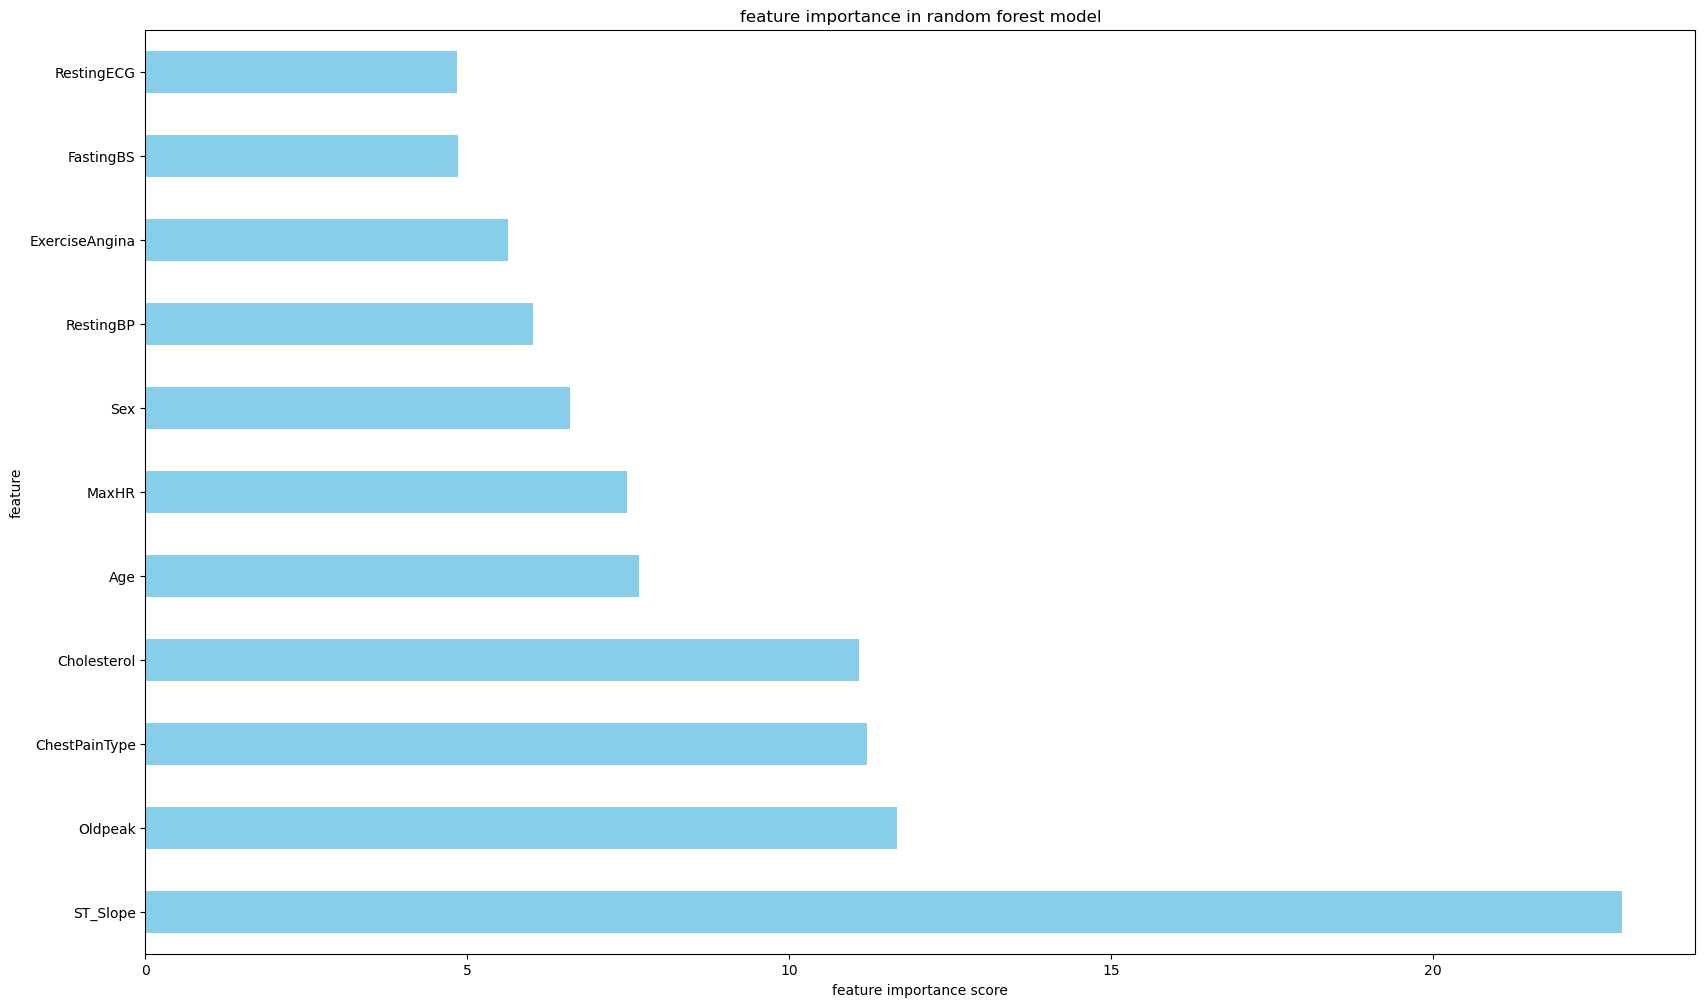

In [256]:
x_train = pd.DataFrame(x_train)
feature_importances = pd.Series(catboost.feature_importances_ , index=x_train.columns)
feature_importances.sort_values(ascending=False).plot(kind='barh', color = 'skyblue', figsize=(20, 12))
plt.xlabel('feature importance score')
plt.ylabel('feature')
plt.title('feature importance in random forest model')

In [257]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,-1.433140,0.515952,0.229032,0.410909,0.825070,-0.551341,0.017255,1.382928,-0.823556,-0.832432,1.052114,0
1,-0.478484,-1.938163,1.275059,1.491752,-0.171961,-0.551341,0.017255,0.754157,-0.823556,0.105664,-0.596078,1
2,-1.751359,0.515952,0.229032,-0.129513,0.770188,-0.551341,1.601219,-1.525138,-0.823556,-0.832432,1.052114,0
3,-0.584556,-1.938163,-0.816995,0.302825,0.139040,-0.551341,0.017255,-1.132156,1.214246,0.574711,-0.596078,1
4,0.051881,0.515952,1.275059,0.951331,-0.034755,-0.551341,0.017255,-0.581981,-0.823556,-0.832432,1.052114,0


In [279]:
lof = LocalOutlierFactor(n_neighbors=10)
y_pred = lof.fit_predict(X)
y_pred[y_pred  == 1] = 0
y_pred[y_pred  == -1] = 1
y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,

In [284]:
len(y_pred[y_pred == 1])

27

In [286]:
data['lof'] = y_pred
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,lof
0,-1.433140,0.515952,0.229032,0.410909,0.825070,-0.551341,0.017255,1.382928,-0.823556,-0.832432,1.052114,0,0
1,-0.478484,-1.938163,1.275059,1.491752,-0.171961,-0.551341,0.017255,0.754157,-0.823556,0.105664,-0.596078,1,0
2,-1.751359,0.515952,0.229032,-0.129513,0.770188,-0.551341,1.601219,-1.525138,-0.823556,-0.832432,1.052114,0,1
3,-0.584556,-1.938163,-0.816995,0.302825,0.139040,-0.551341,0.017255,-1.132156,1.214246,0.574711,-0.596078,1,0
4,0.051881,0.515952,1.275059,0.951331,-0.034755,-0.551341,0.017255,-0.581981,-0.823556,-0.832432,1.052114,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,-0.902775,0.515952,2.321086,-1.210356,0.596393,-0.551341,0.017255,-0.188999,-0.823556,0.293283,-0.596078,1,0
914,1.536902,0.515952,-0.816995,0.627078,-0.053049,1.813758,0.017255,0.164684,-0.823556,2.357094,-0.596078,1,0
915,0.370100,0.515952,-0.816995,-0.129513,-0.620168,-0.551341,0.017255,-0.857069,1.214246,0.293283,-0.596078,1,0
916,0.370100,-1.938163,0.229032,-0.129513,0.340275,-0.551341,-1.566710,1.461525,-0.823556,-0.832432,-0.596078,1,0


In [288]:
df = data[data['lof'] == 0]

In [293]:
X = df.iloc[:,:-2]
y = df.iloc[:,-2]

In [294]:
x_train , x_test , y_train , y_test = train_test_split(X , y , random_state=42)

In [301]:
catboost = CatBoostClassifier(learning_rate=0.05 , iterations=1000 , max_depth=7 , eval_metric='Recall')
catboost.fit(x_train, y_train , eval_set=(x_test , y_test))

0:	learn: 0.8692098	test: 0.8604651	best: 0.8604651 (0)	total: 4.28ms	remaining: 4.27s
1:	learn: 0.8882834	test: 0.8914729	best: 0.8914729 (1)	total: 7.53ms	remaining: 3.76s
2:	learn: 0.9046322	test: 0.9069767	best: 0.9069767 (2)	total: 9.54ms	remaining: 3.17s
3:	learn: 0.9155313	test: 0.9379845	best: 0.9379845 (3)	total: 11.6ms	remaining: 2.88s
4:	learn: 0.9155313	test: 0.9457364	best: 0.9457364 (4)	total: 13.7ms	remaining: 2.72s
5:	learn: 0.9291553	test: 0.9457364	best: 0.9457364 (4)	total: 15.6ms	remaining: 2.58s
6:	learn: 0.9264305	test: 0.9612403	best: 0.9612403 (6)	total: 17.8ms	remaining: 2.53s
7:	learn: 0.9264305	test: 0.9534884	best: 0.9612403 (6)	total: 19.7ms	remaining: 2.44s
8:	learn: 0.9264305	test: 0.9534884	best: 0.9612403 (6)	total: 21.6ms	remaining: 2.38s
9:	learn: 0.9373297	test: 0.9534884	best: 0.9612403 (6)	total: 23.7ms	remaining: 2.35s
10:	learn: 0.9318801	test: 0.9534884	best: 0.9612403 (6)	total: 25.6ms	remaining: 2.31s
11:	learn: 0.9318801	test: 0.9534884	best:

In [302]:
y_pred = catboost.predict(x_test)
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.94      0.79      0.86        94
           1       0.86      0.96      0.91       129

    accuracy                           0.89       223
   macro avg       0.90      0.87      0.88       223
weighted avg       0.89      0.89      0.89       223



In [303]:
cv_scores = cross_val_score(catboost, X, y, cv=5, scoring='accuracy')  # استفاده از Cross-Validation
print(f"catboost Mean Accuracy: {cv_scores.mean():.4f}, Std Dev: {cv_scores.std():.4f}")

0:	learn: 0.8939394	total: 3.11ms	remaining: 3.11s
1:	learn: 0.9040404	total: 5.65ms	remaining: 2.82s
2:	learn: 0.8914141	total: 8.57ms	remaining: 2.85s
3:	learn: 0.8989899	total: 11.2ms	remaining: 2.8s
4:	learn: 0.9065657	total: 13.7ms	remaining: 2.72s
5:	learn: 0.9040404	total: 17ms	remaining: 2.81s
6:	learn: 0.9166667	total: 19.4ms	remaining: 2.75s
7:	learn: 0.9116162	total: 21.7ms	remaining: 2.69s
8:	learn: 0.9090909	total: 23.5ms	remaining: 2.59s
9:	learn: 0.9090909	total: 25.5ms	remaining: 2.52s
10:	learn: 0.9166667	total: 27.4ms	remaining: 2.46s
11:	learn: 0.9166667	total: 29.5ms	remaining: 2.43s
12:	learn: 0.9141414	total: 31.1ms	remaining: 2.36s
13:	learn: 0.9141414	total: 33.1ms	remaining: 2.33s
14:	learn: 0.9166667	total: 34.7ms	remaining: 2.28s
15:	learn: 0.9166667	total: 36.9ms	remaining: 2.27s
16:	learn: 0.9217172	total: 38.8ms	remaining: 2.25s
17:	learn: 0.9242424	total: 40.2ms	remaining: 2.19s
18:	learn: 0.9217172	total: 41.9ms	remaining: 2.16s
19:	learn: 0.9217172	tota

In [ ]:
param_grid = {
    'iterations': [100, 200 , 300 , 500 , 1000],
    'learning_rate': [0.01, 0.1, 0.2 , 0.05],
    'max_depth': [4 , 6 , 7 , 8]
}

# انجام گرید سرچ
grid_search = GridSearchCV(estimator=catboost, param_grid=param_grid, cv=3, scoring='accuracy', verbose=1)
grid_search.fit(x_train, y_train)

# نمایش بهترین هایپرپارامترها و مدل بهینه
print("Best Parameters: ", grid_search.best_params_)


In [ ]:
catboost = CatBoostClassifier(learning_rate=0.1 , iterations=100 , max_depth=8 , eval_metric='Recall')
catboost.fit(x_train, y_train , eval_set=(x_test , y_test))

In [ ]:
y_pred = catboost.predict(x_test)
print(classification_report(y_test , y_pred))